In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
df2 = pd.read_excel('spotify all combined final.xlsx')
df2.head()

,track,artist,decade,decade in year,uri,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,Garland Green,60,1960,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,...,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,60,1960,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,...,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,60,1960,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,...,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba SonÃ³,Celia Cruz,60,1960,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,...,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,60,1960,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,...,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


In [4]:
df2.shape

(41106, 21)

In [5]:
df2.drop_duplicates(inplace=True)

In [6]:
df2.shape

(41106, 21)

- The set with decades have no duplicate rows where as the same set without decades has duplicates.
- This shows that decades is the only feature that is making those rows unique 
- This also means that some songs have been a hit in more than one decades
- This futher implies that we don't have any duplicate rows

### Checking for unique values

In [7]:
df2.nunique()

track               35859
artist              11904
decade                  6
decade in year          6
uri                 40560
danceability         1048
energy               1787
key                    12
loudness            16160
mode                    2
speechiness          1346
acousticness         4194
instrumentalness     5122
liveness             1674
valence              1609
tempo               32152
duration_ms         21517
time_signature          5
chorus_hit          39950
sections               84
target                  2
dtype: int64

### Checking the data types

In [38]:
df2.dtypes

track                object
artist               object
decade                int64
decade in year        int64
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
target                int64
dtype: object

### Checking for Null Values

In [39]:
df2.isnull().sum()

track               0
artist              0
decade              0
decade in year      0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

## Univarient analysis

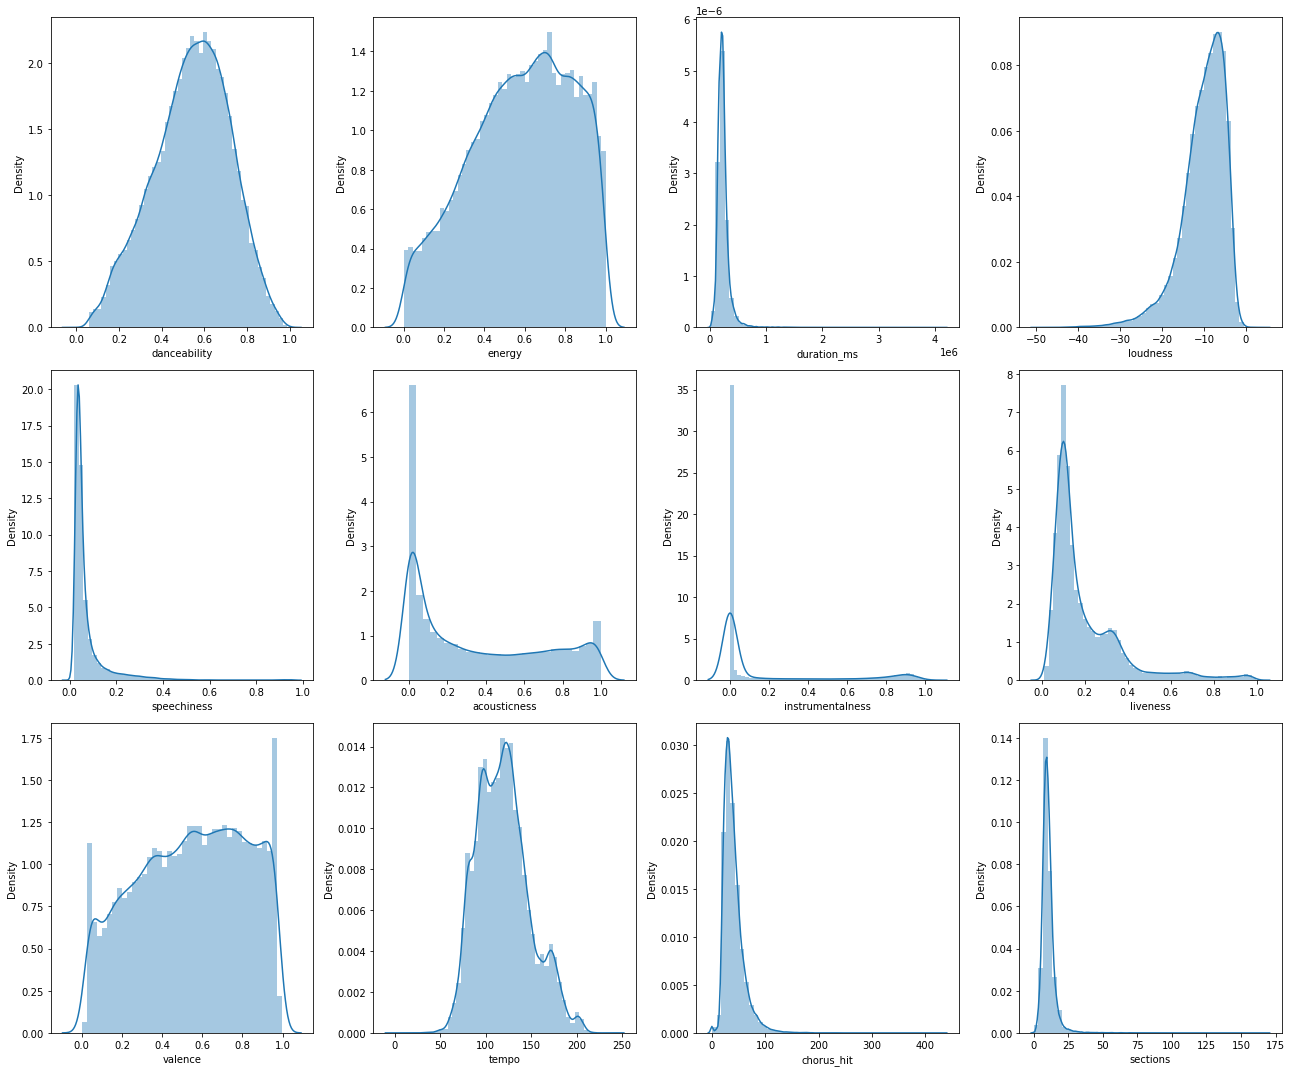

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

l = ['danceability','energy','duration_ms','loudness','speechiness','acousticness',
     'instrumentalness','liveness','valence','tempo','chorus_hit','sections']

plt.rcParams['figure.figsize'] = [18,15]

for (i,j) in zip(l,range(1,len(l)+1)):
    plt.subplot(3,4,j)
    sns.distplot(df2[i])

plt.tight_layout()
plt.show()

#### Skewness

In [9]:
df2[['danceability','energy','loudness','speechiness',
     'acousticness','instrumentalness','liveness','valence',
     'tempo','chorus_hit','sections']].skew()

danceability       -0.251762
energy             -0.320168
loudness           -1.415109
speechiness         4.573376
acousticness        0.493360
instrumentalness    1.745277
liveness            2.123818
valence            -0.179745
tempo               0.485278
chorus_hit          2.215338
sections            6.053588
dtype: float64

In [10]:
#Checking the balance in the target variable

df2['target'].value_counts()

1    20553
0    20553
Name: target, dtype: int64

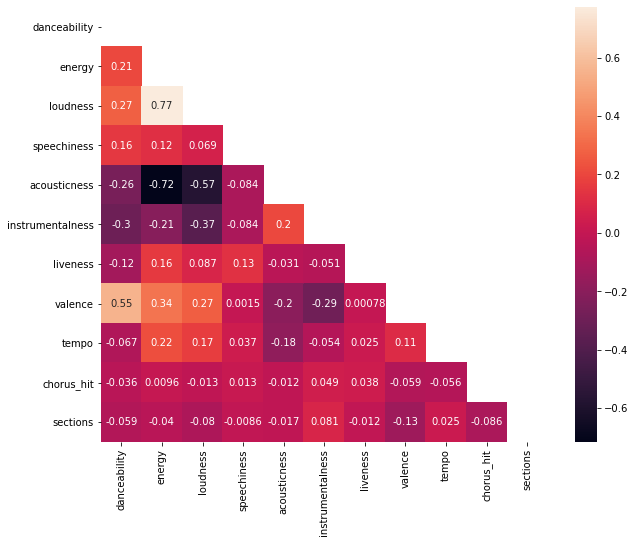

In [11]:
matrix = df2[['danceability','energy','loudness','speechiness',
     'acousticness','instrumentalness','liveness','valence',
     'tempo','chorus_hit','sections']].corr()

cor = np.triu(matrix)

plt.rcParams['figure.figsize'] = [10,8]

sns.heatmap(matrix,annot=True,mask=cor)
plt.show()

##### Interpretation

- All columns appear to be multicolinear with most
- danceability has a high correleation with valence
- Energy has a very high correleation with loudness
- accousticness has a high negative correlation with loudness and energy





In [12]:
df2['decade'].replace(0,2000, inplace = True)
df2['decade'].replace(10,2010, inplace = True)
df2['decade'].replace(60,1960, inplace = True)
df2['decade'].replace(70,1970, inplace = True)
df2['decade'].replace(80,1980, inplace = True)
df2['decade'].replace(90,1990, inplace = True)


In [13]:
df2[['decade']].head()

,decade
0,1960
1,1960
2,1960
3,1960
4,1960


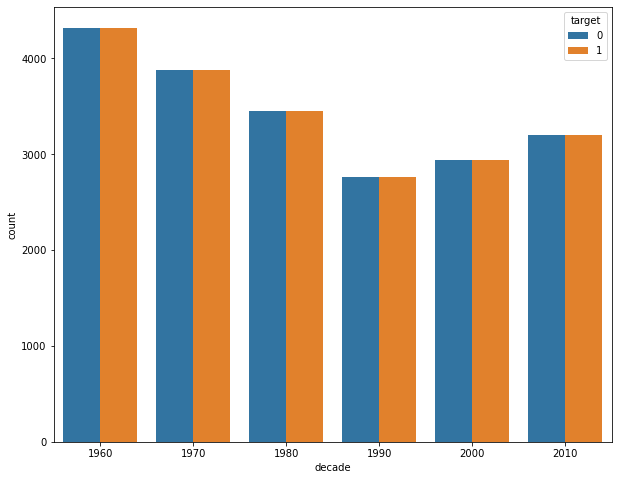

In [14]:
sns.countplot(df2['decade'],hue = df2['target'])
plt.show()

- this can have two inferences
 
 a. There was a steady drop in the overeall songs being made from 1960 -1980 post which the number of songs being produced started picking up
 
 b. The data has been collected such that there was a balance between the number of hits for each year, hence its possible that there were more songs for that decade but this datas set doesn't have their information.

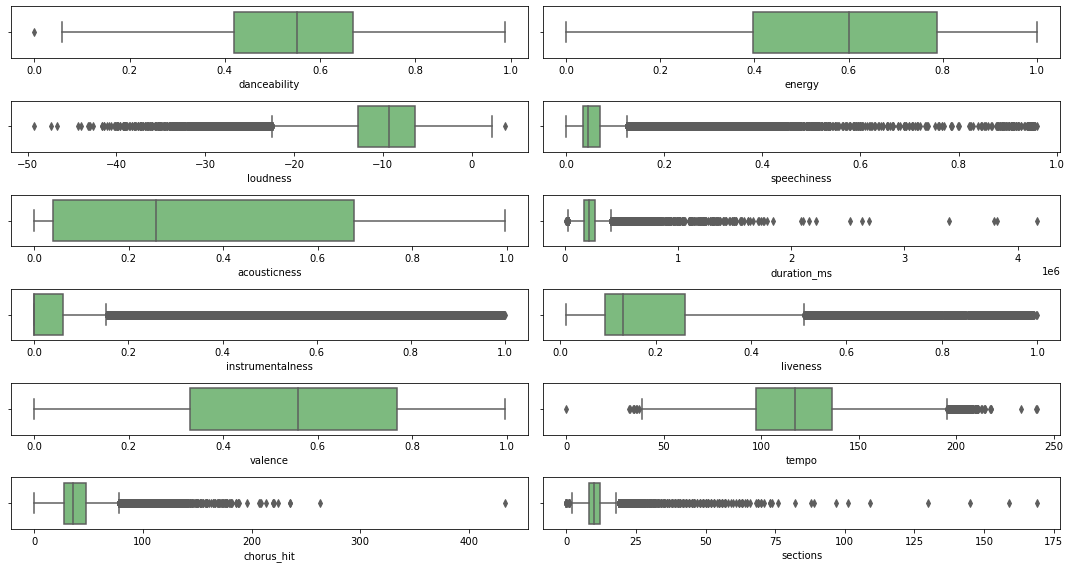

In [15]:
l = ['danceability','energy','loudness','speechiness','acousticness','duration_ms',
     'instrumentalness','liveness','valence','tempo','chorus_hit','sections']



plt.rcParams['figure.figsize'] = [15,8]
for (i,j) in zip(l,range(1,len(l)+1)):
    plt.subplot(6,2,j)
    sns.boxplot(df2[i],palette = 'Greens')

plt.tight_layout()
plt.show()


- outliers are present in most features

In [48]:
df2.drop('uri',axis=1,inplace=True)

TOP 5 ARTISTS WITH MAXIMUM HITS IN 1960 



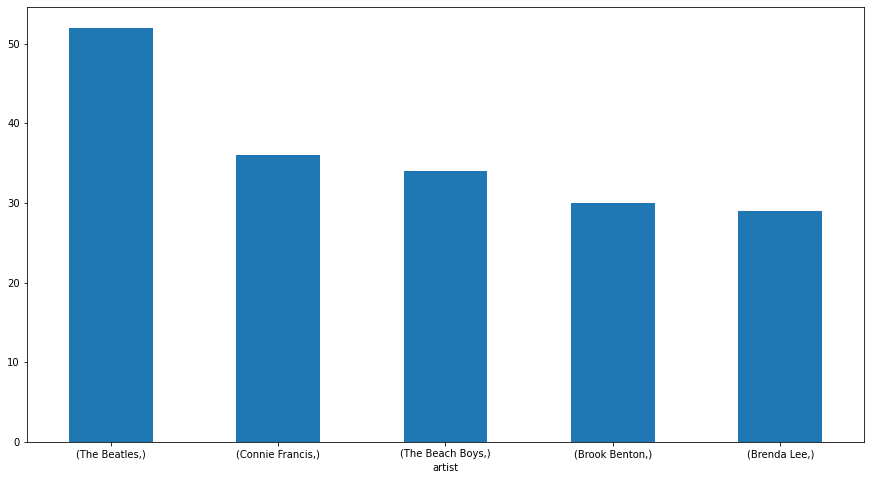



TOP 5 ARTISTS WITH MAXIMUM HITS IN 1970 



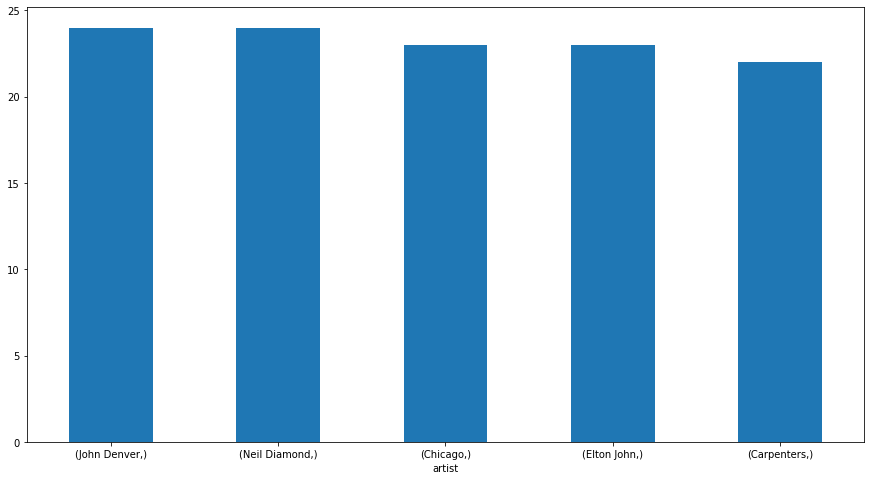



TOP 5 ARTISTS WITH MAXIMUM HITS IN 1980 



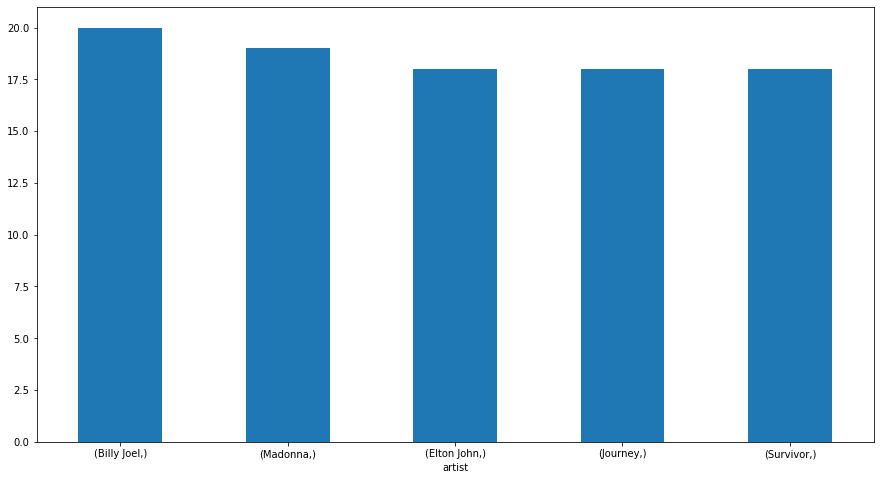



TOP 5 ARTISTS WITH MAXIMUM HITS IN 1990 



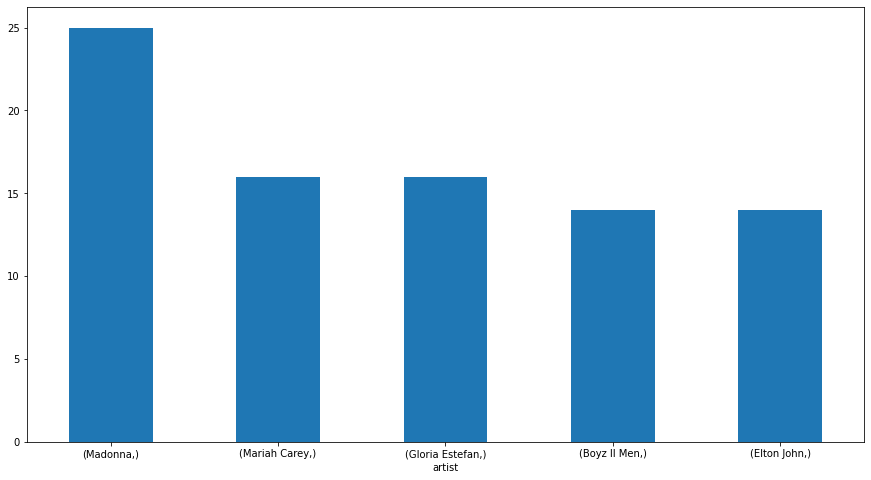



TOP 5 ARTISTS WITH MAXIMUM HITS IN 2000 



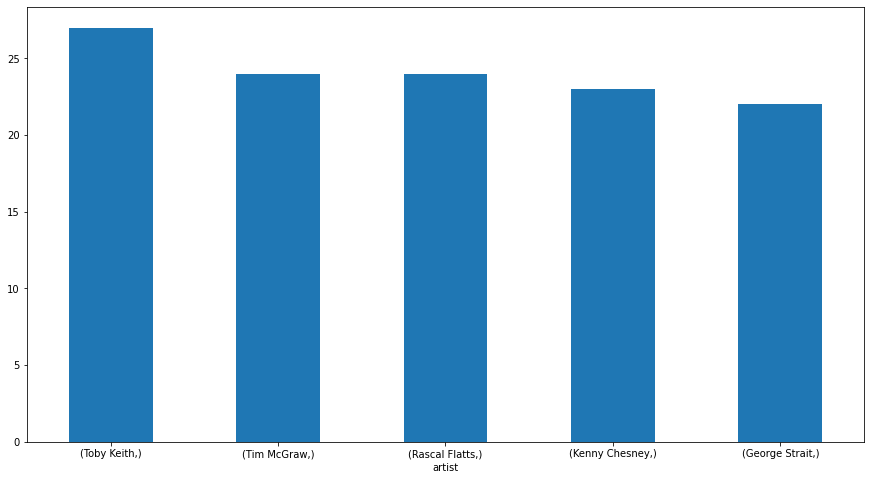



TOP 5 ARTISTS WITH MAXIMUM HITS IN 2010 



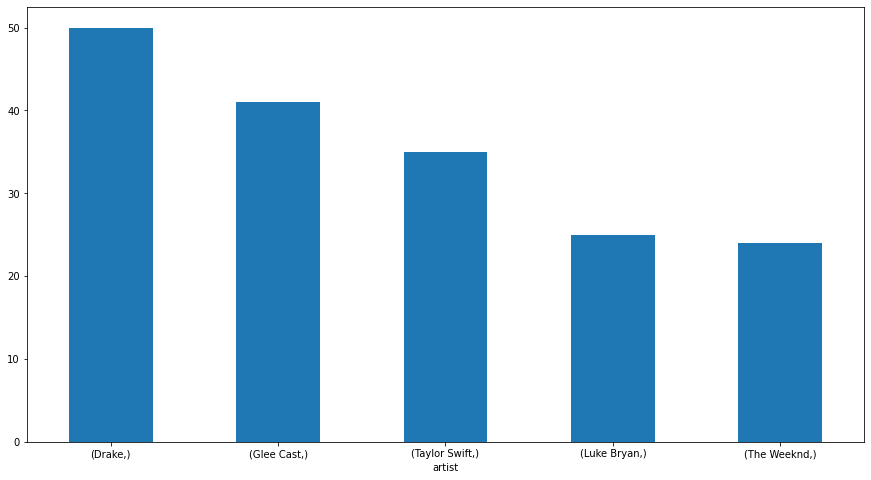

In [20]:
for i in df2['decade'].unique():
    print('TOP 5 ARTISTS WITH MAXIMUM HITS IN',i,'\n')
    df2[(df2['target'] == 1) & (df2['decade']==i)][['artist']].value_counts().head().plot(kind='bar')
    plt.xticks(rotation =360)
    plt.show()
    print('\n')

## Bi-Varient Analysis

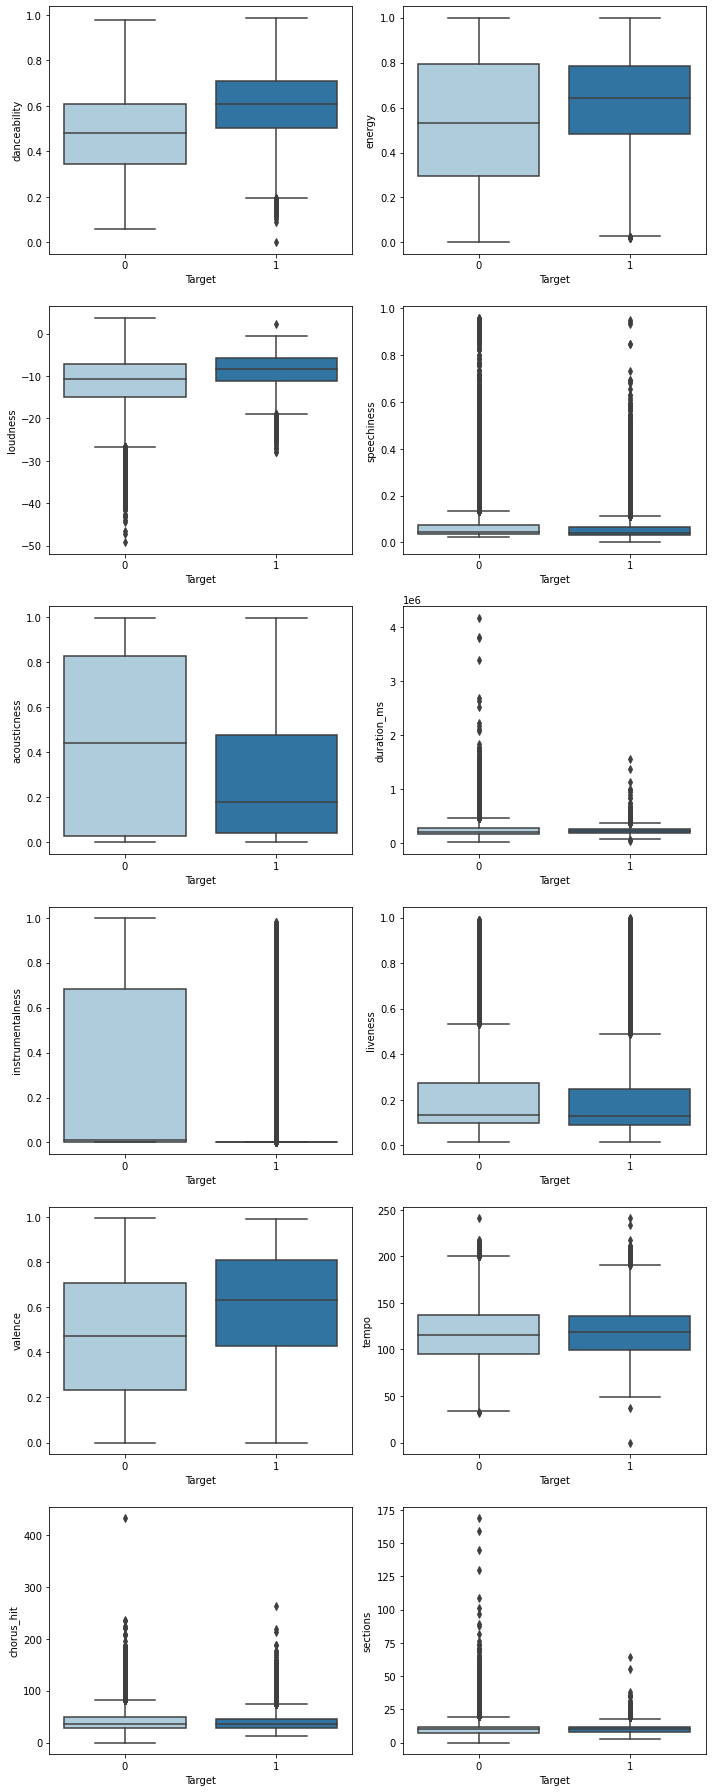

In [21]:
l = ['danceability','energy','loudness','speechiness','acousticness','duration_ms',
     'instrumentalness','liveness','valence','tempo','chorus_hit','sections']
plt.rcParams['figure.figsize'] = [10,25]

for (i,j) in zip(l,range(1,len(l)+1)):
    plt.subplot(6,2,j)
    sns.boxplot(df2['target'],df2[i],palette = 'Paired')
    plt.xlabel('Target')

plt.tight_layout()
plt.show()


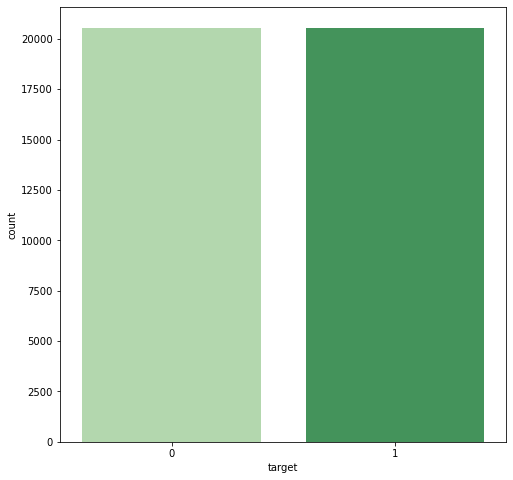

1    20553
0    20553
Name: target, dtype: int64

In [22]:
plt.rcParams['figure.figsize'] = [8,8]

sns.countplot(df2['target'],palette='Greens')

plt.show()

df2['target'].value_counts()

In [52]:
df2.nunique()

track               35859
artist              11904
decade                  6
decade in year          6
danceability         1048
energy               1787
key                    12
loudness            16160
mode                    2
speechiness          1346
acousticness         4194
instrumentalness     5122
liveness             1674
valence              1609
tempo               32152
duration_ms         21517
time_signature          5
chorus_hit          39950
sections               84
target                  2
dtype: int64

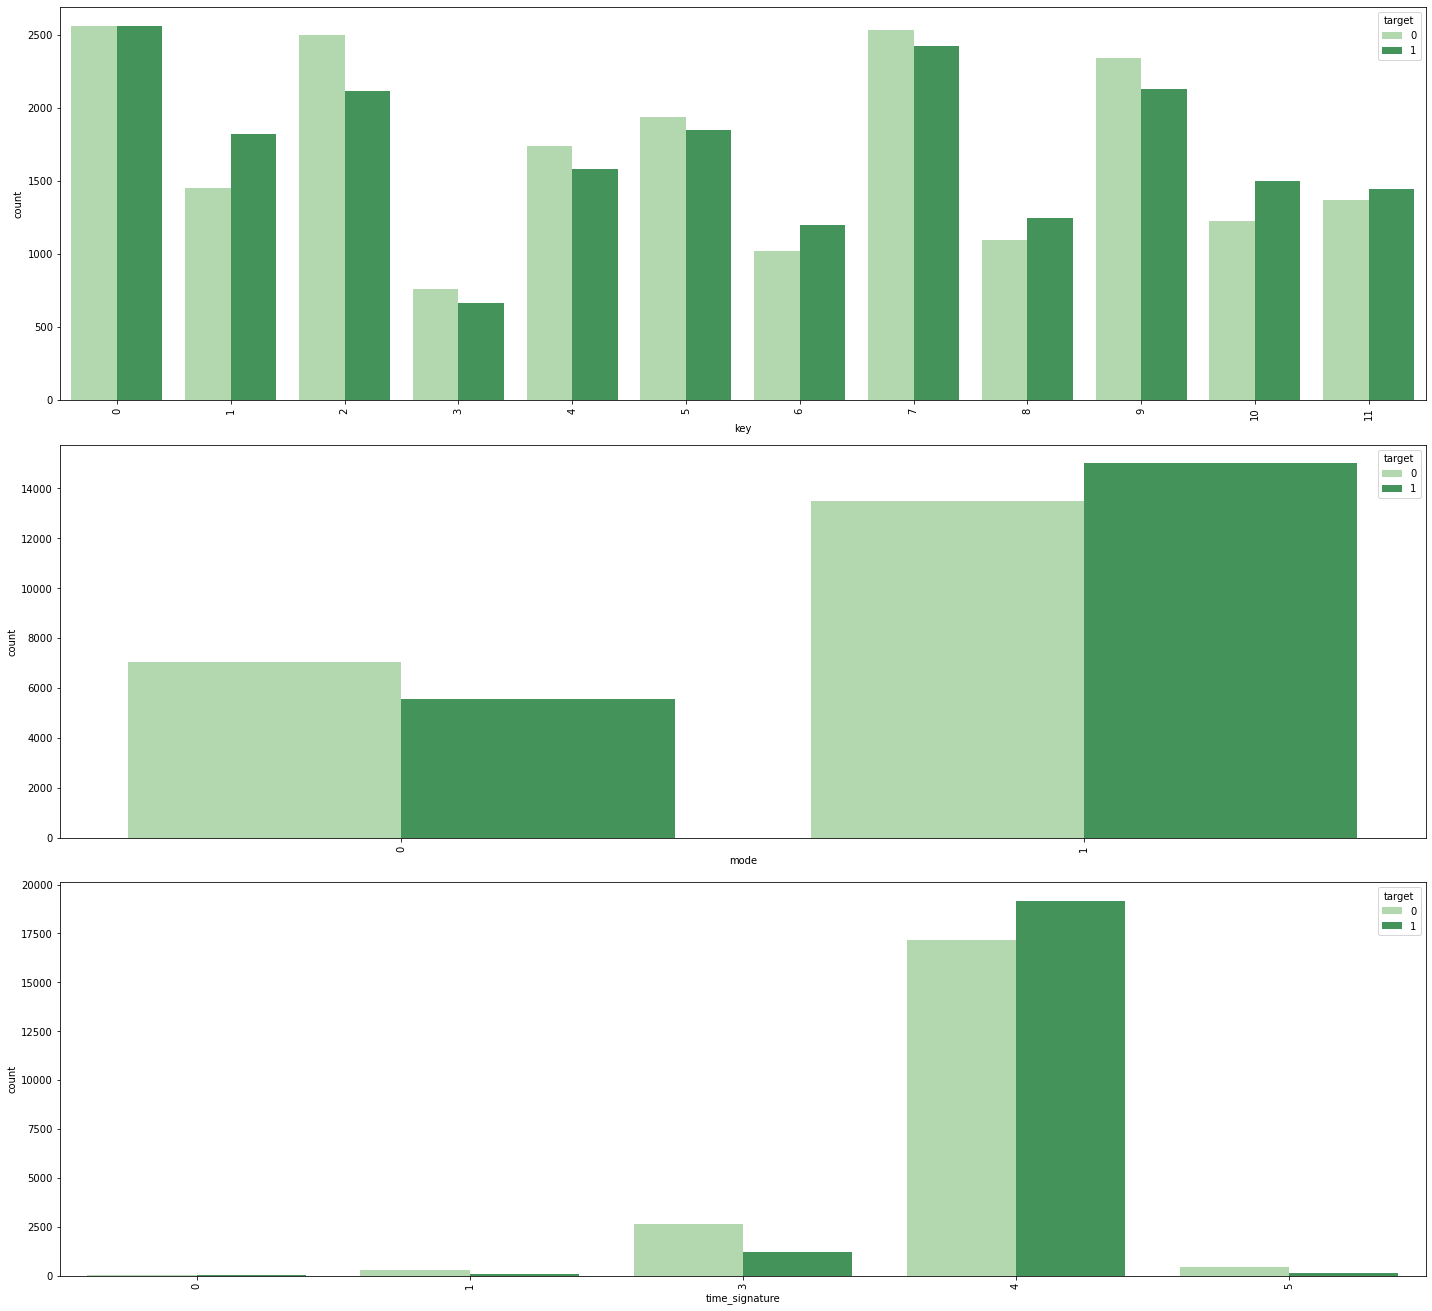

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
l = ['key','mode','time_signature']
plt.rcParams['figure.figsize']=[20,24]
for (i,j) in zip(l,range(1,len(l)+1)):
    plt.subplot(4,1,j)
    sns.countplot(df2[i],hue=df2['target'],palette='Greens')
    plt.xticks(rotation = 90)
    
plt.tight_layout()    
plt.show()

In [54]:
d = [1960,1970,1980,1990,2000,2010]
l = ['danceability','energy','loudness','speechiness','acousticness','duration_ms',
     'instrumentalness','liveness','valence','tempo','chorus_hit','decade','sections']

new = pd.DataFrame(columns= ['artist','acousticness', 'chorus_hit', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence','decade','sections'])

for i in d:
    a = df2[(df2['target']== 1) & (df2['decade']== i)]

    x = pd.pivot_table(a,values = l,index = df2['artist'] )

    x = x.reset_index()
    
    new = pd.concat([new,x],axis=0)
    
new.head()

,artist,acousticness,chorus_hit,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,decade,sections
0,2 Of Clubs,0.011900,38.499530,0.482000,148023.000000,0.496000,0.000000,0.174000,-10.216000,0.02800,139.070000,0.530000,1960,8.000000
1,Aaron Neville,0.527500,25.451935,0.481500,181960.000000,0.404000,0.000002,0.183500,-8.938000,0.03135,137.890000,0.749000,1960,9.500000
2,Ace Cannon,0.700250,37.733805,0.698500,134576.750000,0.340750,0.771500,0.117800,-12.629750,0.06075,148.322500,0.798250,1960,6.750000
3,Adam Faith,0.313000,24.770700,0.263000,161787.000000,0.944000,0.000000,0.929000,-5.180000,0.11400,80.280000,0.381000,1960,8.000000
4,Adam Wade,0.841778,44.655514,0.336667,167672.777778,0.226444,0.000000,0.224678,-13.573667,0.03190,108.275444,0.271556,1960,7.333333


In [55]:
new.drop_duplicates(inplace=True)
new['artist'].nunique(),new.shape

(6694, (7943, 14))

In [56]:
new.shape

(7943, 14)

In [57]:
new.sort_values(by='decade',ascending = True,inplace = True)

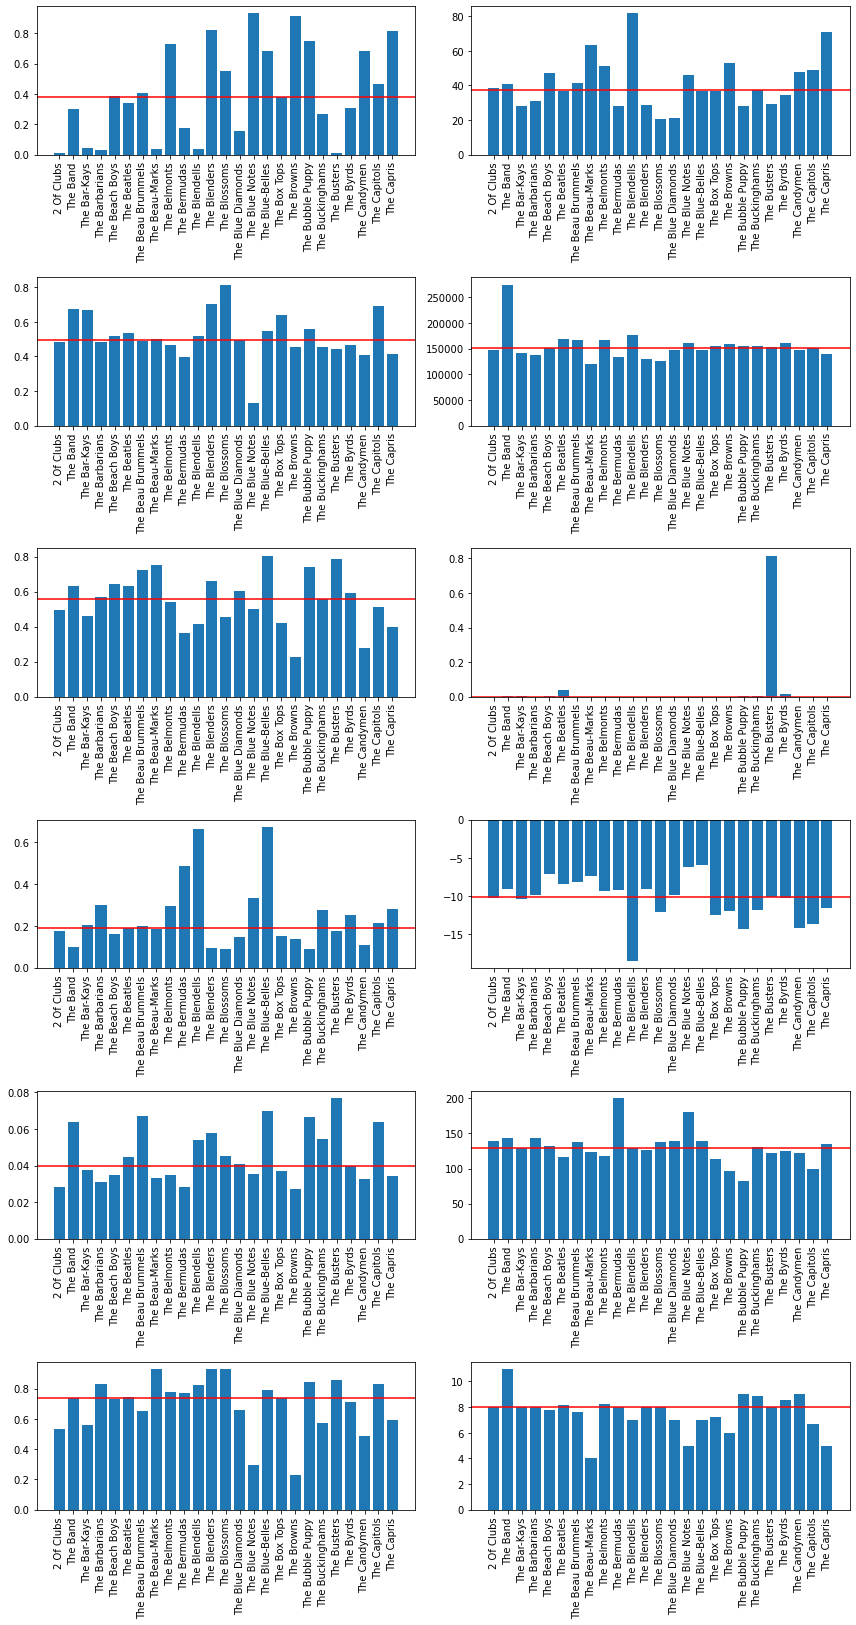

THE ABOVE GRAPHS REPRESENT MEASURES OF HITS OF 25 ARTISTS IN THE YEAR 1960 ALONG WITH THE MDEIAN FOR EACH METRIC


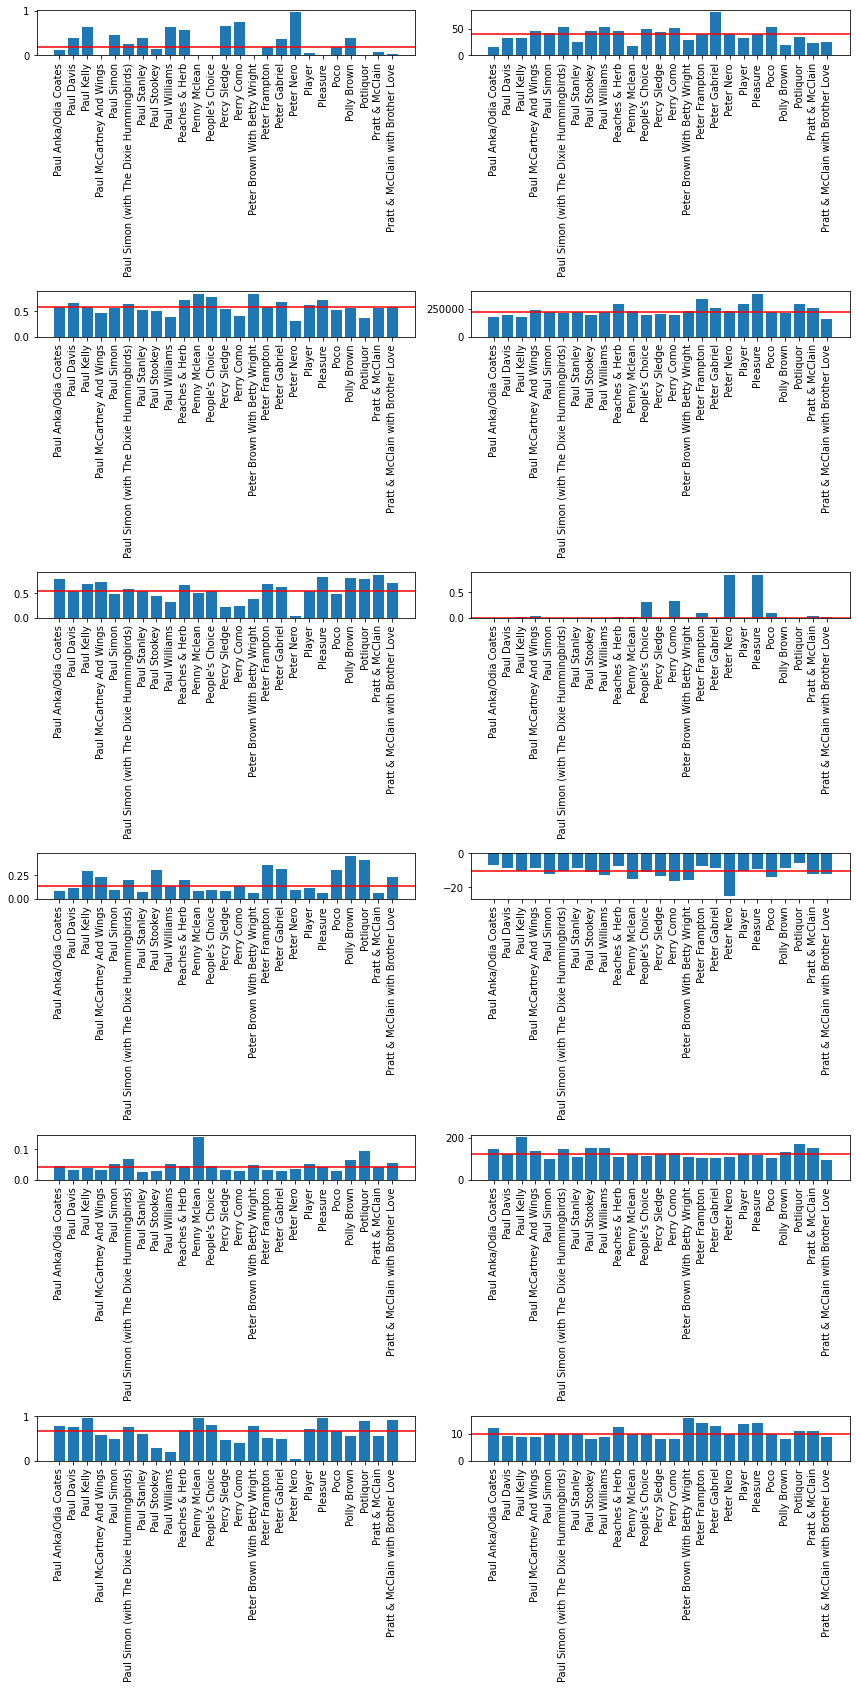

THE ABOVE GRAPHS REPRESENT MEASURES OF HITS OF 25 ARTISTS IN THE YEAR 1970 ALONG WITH THE MDEIAN FOR EACH METRIC


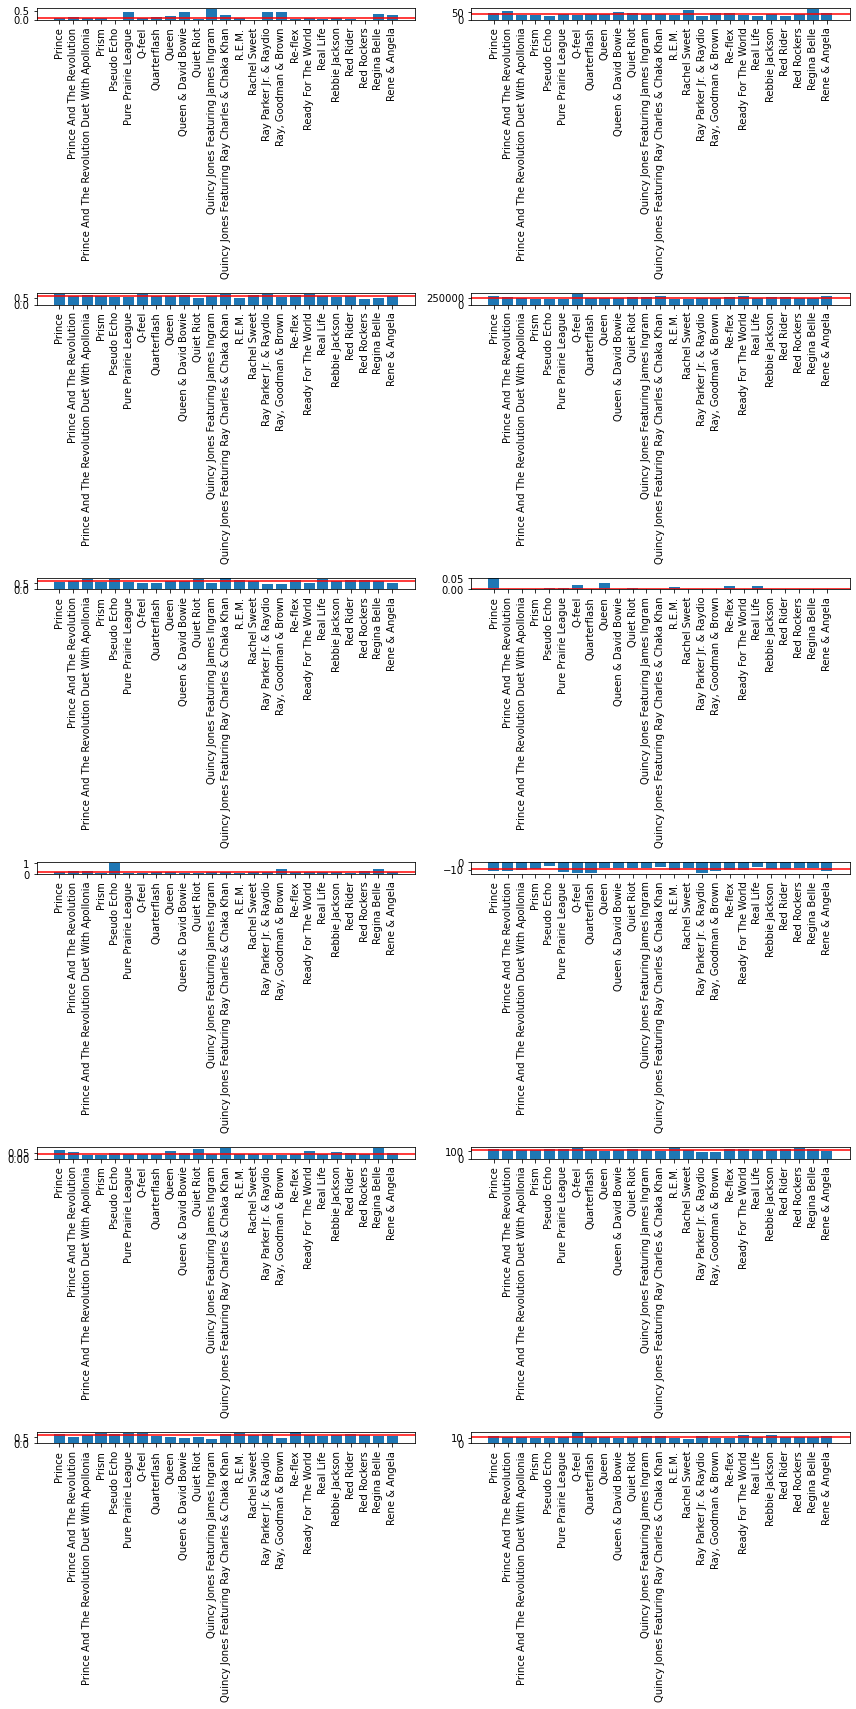

THE ABOVE GRAPHS REPRESENT MEASURES OF HITS OF 25 ARTISTS IN THE YEAR 1980 ALONG WITH THE MDEIAN FOR EACH METRIC


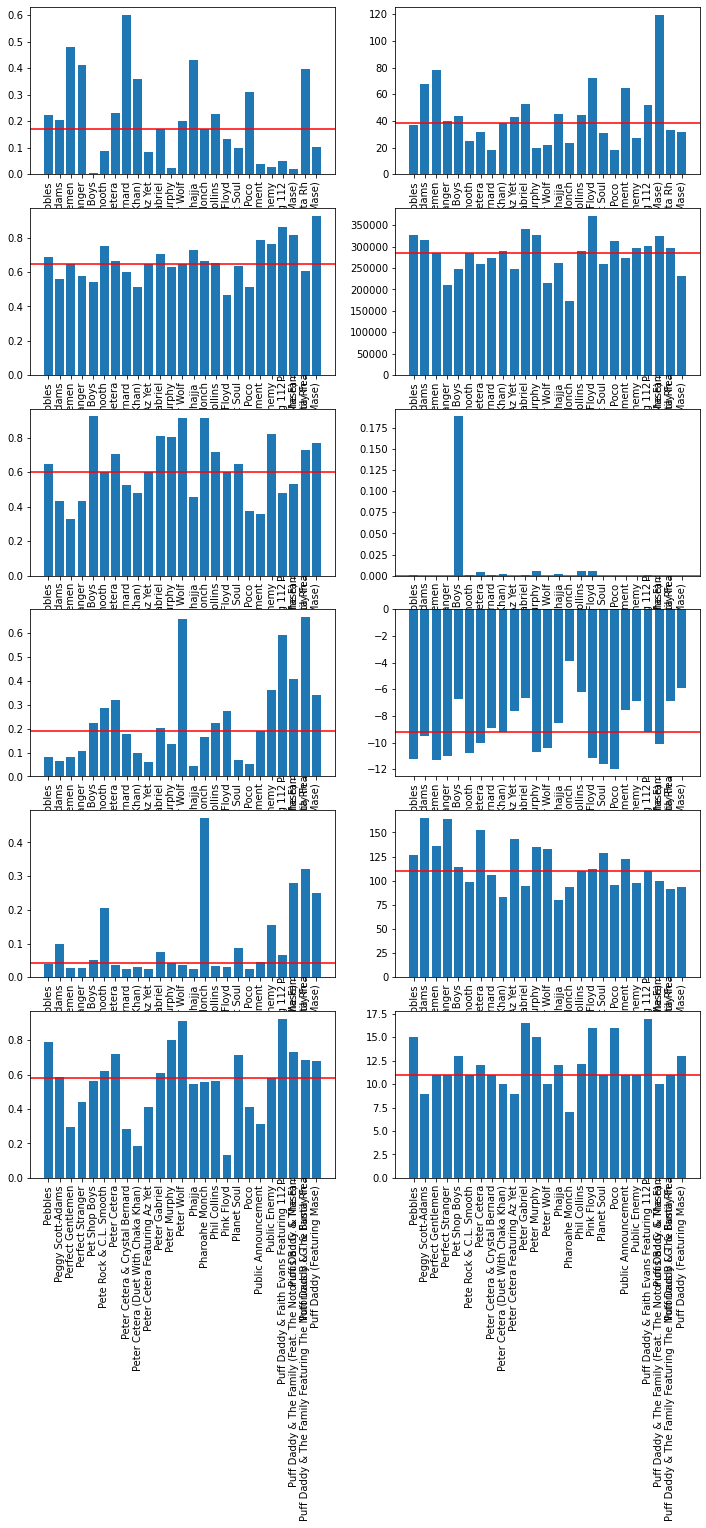

THE ABOVE GRAPHS REPRESENT MEASURES OF HITS OF 25 ARTISTS IN THE YEAR 1990 ALONG WITH THE MDEIAN FOR EACH METRIC


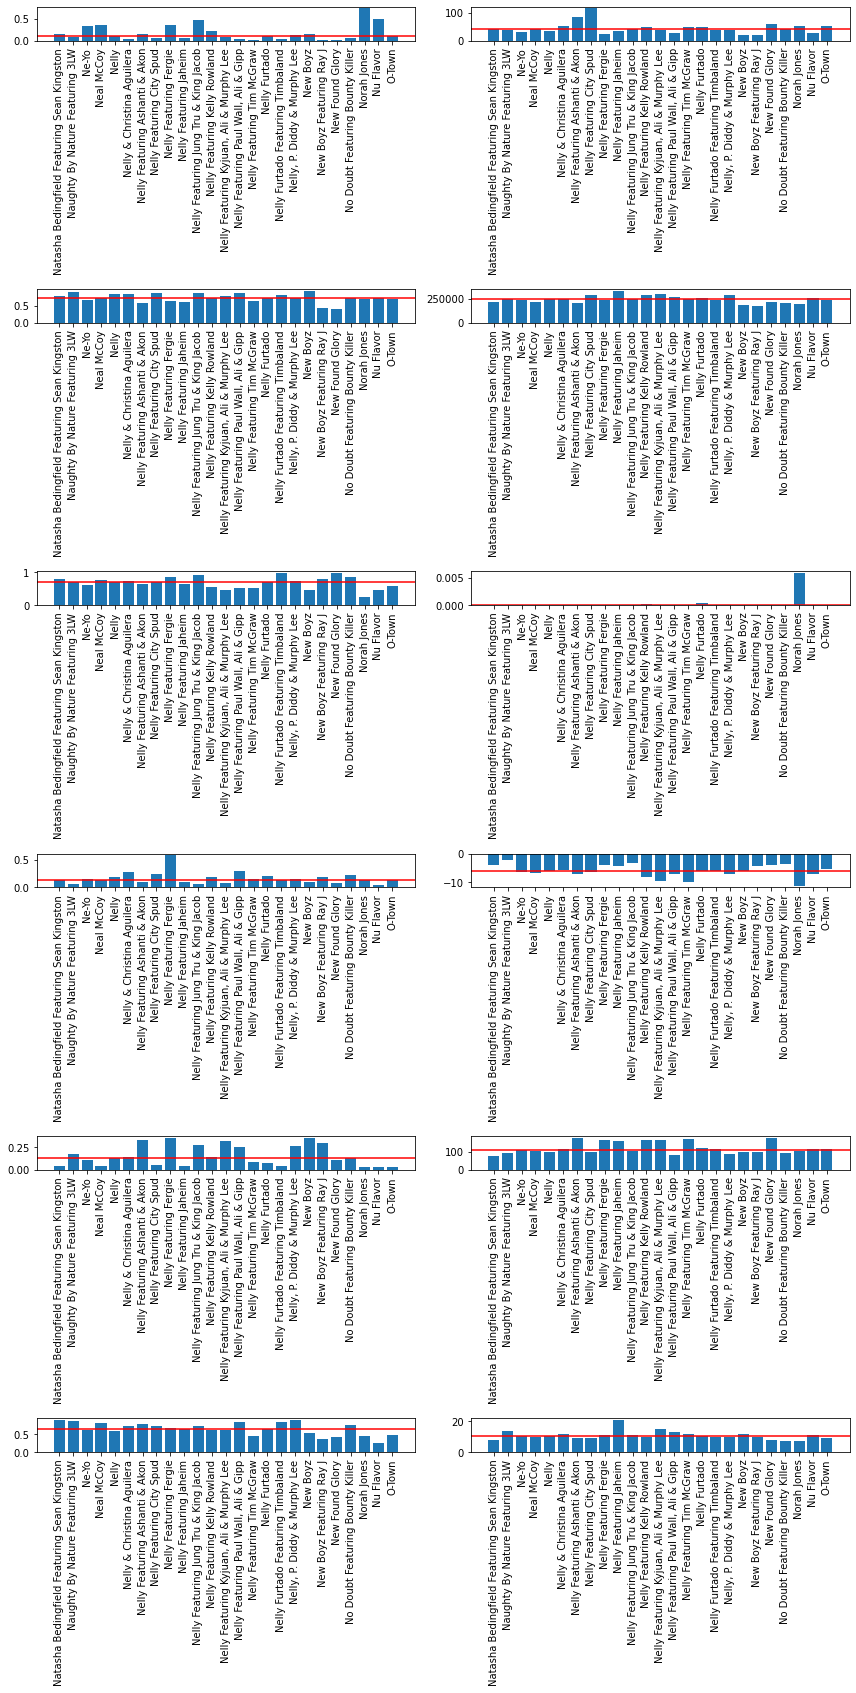

THE ABOVE GRAPHS REPRESENT MEASURES OF HITS OF 25 ARTISTS IN THE YEAR 2000 ALONG WITH THE MDEIAN FOR EACH METRIC


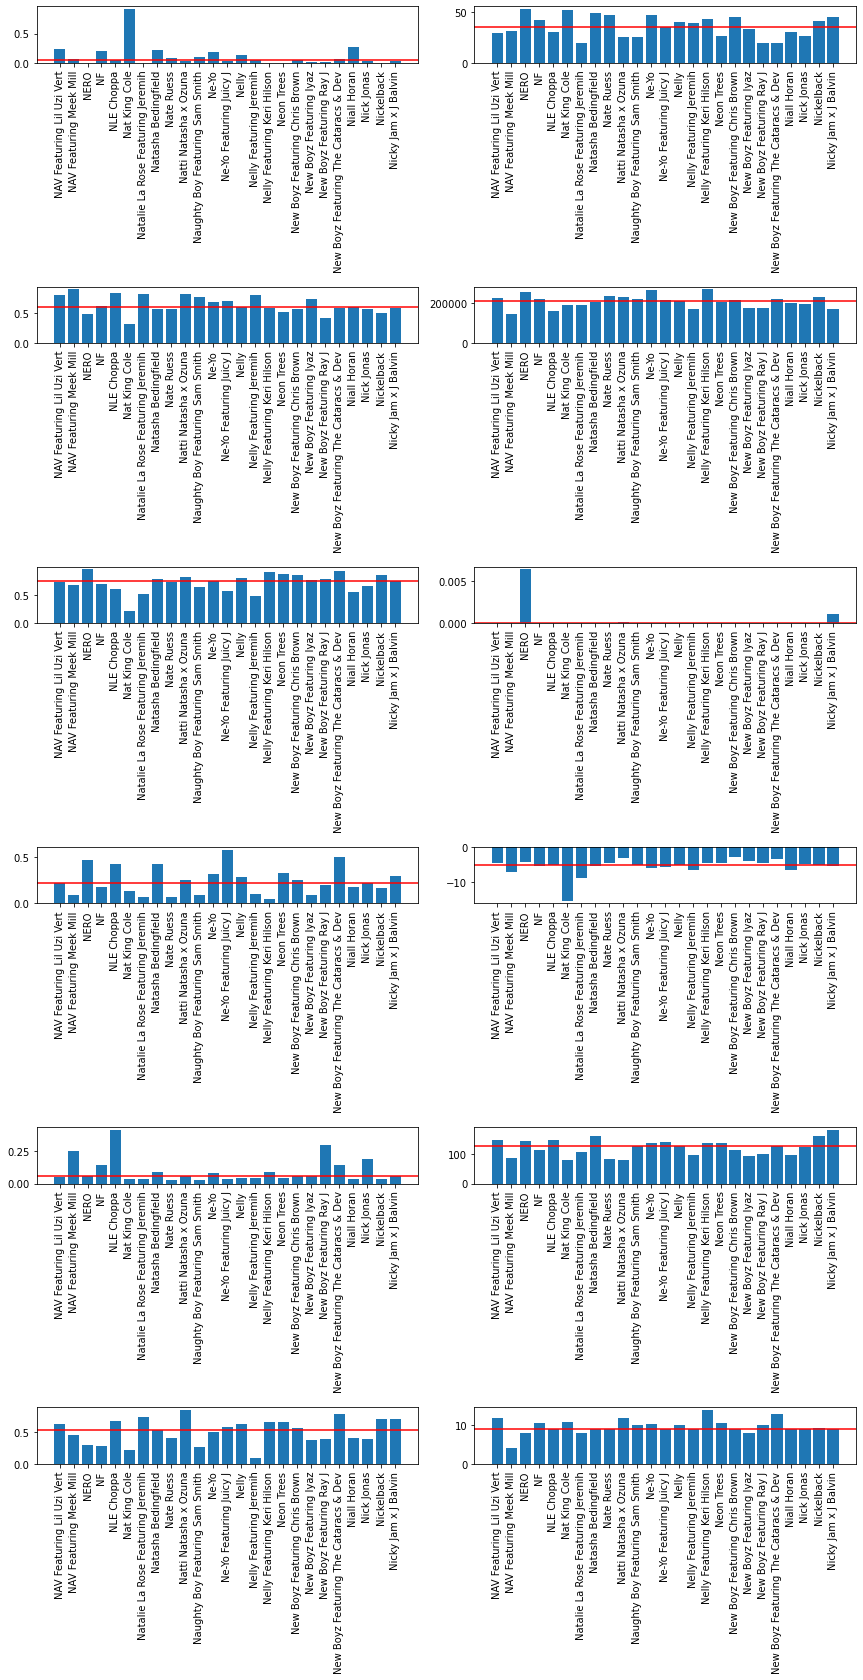

THE ABOVE GRAPHS REPRESENT MEASURES OF HITS OF 25 ARTISTS IN THE YEAR 2010 ALONG WITH THE MDEIAN FOR EACH METRIC


In [58]:
year = [1960,1970,1980,1990,2000,2010]
columns = ['acousticness','chorus_hit','danceability','duration_ms','energy',
           'instrumentalness','liveness','loudness','speechiness','tempo','valence','sections']



for k in year:
    
    g = new[new['decade']== k].head(25).sort_values(by='artist')
    plt.rcParams['figure.figsize'] = [12,40]
    for (i,j) in zip(columns,range(1,len(columns)+1)):
        plt.subplot(11,2,j)
        plt.bar(g['artist'],g[i])
        plt.xticks(rotation = 90)
        plt.axhline(np.median(g[i]),color = 'red')
        

    plt.tight_layout()
    plt.show()
    print('THE ABOVE GRAPHS REPRESENT MEASURES OF HITS OF 25 ARTISTS IN THE YEAR',k,'ALONG WITH THE MDEIAN FOR EACH METRIC')

In [59]:
df2.head()

,track,artist,decade,decade in year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,Garland Green,1960,1960,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,1960,1960,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,1960,1960,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba SonÃ³,Celia Cruz,1960,1960,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,1960,1960,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0
